# Sample Lya posterior as a function of nuisance parameters

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import os
import json
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120
mpl.rcParams['figure.dpi'] = 120
import cProfile
import emcee
import corner
# our own modules
import mf_emulator
import data_MPGADGET
import simplest_emulator
import linear_emulator
import gp_emulator
import data_PD2013
import mean_flux_model
import thermal_model
import pressure_model
import lya_theory
import likelihood
import emcee_sampler

### Setup Lya likelihood function

In [2]:
# read P1D measurement
#data=data_PD2013.P1D_PD2013(blind_data=True,zmin=2.1,zmax=4.7)
data=data_MPGADGET.P1D_MPGADGET(filename="1024_L90_mimic.json",z_list=[2.0,3.0,4.0])
zs=data.z

In [3]:
#basedir='../../p1d_emulator/sim_suites/emulator_512_18062019/'
#basedir='../../p1d_emulator/sim_suites/emulator_512_17052019/'
basedir='../../p1d_emulator/sim_suites/emulator_256_15072019/'
kmax_Mpc=4.0
p1d_label=None
skewers_label='Ns256_wM0.05'
undersample_z=1
max_arxiv_size=2000
paramList=["Delta2_p","n_p","mF","sigT_Mpc","gamma","kF_Mpc"]
emu_type='mf'
if emu_type=='polyfit':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,emu_type=emu_type,
                                kmax_Mpc=kmax_Mpc,verbose=False,paramList=paramList,train=True)
elif emu_type=='k_bin':
    emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,
                               undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                               verbose=False,paramList=paramList,train=True,emu_type=emu_type)
elif emu_type=='linear':
    # specify parameters to emulate
    emulate_slope=False
    emulate_growth=False
    emulate_running=False
    emulate_pressure=True
    emu=linear_emulator.LinearEmulator(basedir,p1d_label,skewers_label,kmax_Mpc=kmax_Mpc,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                emulate_slope=emulate_slope,emulate_running=emulate_running,
                                emulate_pressure=emulate_pressure,emulate_growth=emulate_growth,verbose=False)
elif emu_type=='NGP':
    emu=simplest_emulator.SimplestEmulator(basedir,p1d_label,skewers_label,
                                undersample_z=undersample_z,max_arxiv_size=max_arxiv_size,
                                verbose=False)
elif emu_type=='mf':
    emu=mf_emulator.MeanFluxEmulator(basedir,p1d_label,skewers_label,
                                kmax_Mpc=kmax_Mpc,emu_type='k_bin',
                                max_arxiv_size=None,
                                verbose=True,paramList=paramList,train=True)
else:
    raise ValueError('wrong emulator type '+emu_type)

0 0.05 0.0 <mf< 0.15000000000000002
1 0.15 0.04999999999999999 <mf< 0.25
2 0.25 0.15 <mf< 0.35
3 0.35 0.24999999999999997 <mf< 0.44999999999999996
4 0.44999999999999996 0.35 <mf< 0.5499999999999999
5 0.5499999999999999 0.44999999999999996 <mf< 0.6499999999999999
6 0.65 0.55 <mf< 0.75
7 0.75 0.65 <mf< 0.85
8 0.85 0.75 <mf< 0.95
9 0.95 0.85 <mf< 1.0
latin hyper-cube data {'param_space': {'Delta2_star': {'ip': 0, 'min_val': 0.25, 'max_val': 0.45, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$\\Delta^2_\\star$'}, 'n_star': {'ip': 1, 'min_val': -2.35, 'max_val': -2.25, 'z_star': 3.0, 'kp_Mpc': 0.7, 'latex': '$n_\\star$'}, 'heat_amp': {'ip': 2, 'min_val': 0.3, 'max_val': 3.0, 'latex': '$H_A$'}, 'heat_slo': {'ip': 3, 'min_val': -1.5, 'max_val': 1.5, 'latex': '$H_S$'}, 'z_rei': {'ip': 4, 'min_val': 5.5, 'max_val': 16.0, 'latex': '$z_r$'}}, 'nsamples': 50, 'samples': {'0': [0.392, -2.319, 2.757, -0.4500000000000002, 11.905000000000001], '1': [0.268, -2.327, 1.0830000000000002, -1.41, 6.025], '2': [0

38 sample has sim params = [0.252, -2.321, 0.5429999999999999, -0.1499999999999999, 14.845]
simulation has 3 redshifts
undersample_z = 1
39 sample has sim params = [0.40800000000000003, -2.273, 1.7850000000000004, -0.33000000000000007, 10.434999999999999]
simulation has 3 redshifts
undersample_z = 1
40 sample has sim params = [0.42000000000000004, -2.317, 1.461, 0.6299999999999999, 7.915]
simulation has 3 redshifts
undersample_z = 1
41 sample has sim params = [0.336, -2.339, 2.4330000000000003, 0.9300000000000002, 8.965]
simulation has 3 redshifts
undersample_z = 1
42 sample has sim params = [0.348, -2.275, 1.569, 1.4699999999999998, 11.065000000000001]
simulation has 3 redshifts
undersample_z = 1
43 sample has sim params = [0.444, -2.309, 1.299, -1.0499999999999998, 13.795]
simulation has 3 redshifts
undersample_z = 1
44 sample has sim params = [0.43200000000000005, -2.253, 1.7310000000000003, 0.2100000000000002, 14.635]
simulation has 3 redshifts
undersample_z = 1
45 sample has sim p

 /home/font/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Optimised
6750 initial entries
use 353/6750 entries
build emulator 1/10, <F>=0.150
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 353 points
Optimised
6750 initial entries
use 859/6750 entries
build emulator 2/10, <F>=0.250
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 859 points
Optimised
6750 initial entries
use 1221/6750 entries
build emulator 3/10, <F>=0.350
Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Cannot load emulators with non-standard training data
will train GP emulator
Training GP on 1221 points
Optimised
6750 initial entries
use 1409/6750 entries
build emulator 4/10, <F>=0.450
Loading emulator using a specific arxiv, not the one set

In [4]:
#theory=lya_theory.LyaTheory(zs,emulator=emu)
theory=lya_theory.get_mock_theory(zs,emulator=emu,alternative_pressure=True)

Note: redshifts have been re-sorted (earliest first)


In [6]:
# specify free parameters in likelihood
#free_parameters=['ln_kF_0']
#free_parameters=['ln_tau_0','ln_tau_1']
#free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0']
free_parameters=['ln_tau_0','ln_tau_1','ln_gamma_0','ln_kF_0','T0_1','T0_2','T0_3']
min_kp_kms=0.003
prior_Gauss_rms=0.02
# ignore emulator covariance for now
ignore_emu_cov=True
like=likelihood.Likelihood(data=data,theory=theory,free_parameters=free_parameters,
                           min_kp_kms=min_kp_kms,ignore_emu_cov=ignore_emu_cov,
                           prior_Gauss_rms=prior_Gauss_rms,verbose=True)

likelihood setup with 7 free parameters
7 free parameters


In [7]:
for p in like.free_params:
    print(p.name,p.value,p.min_value,p.max_value)

ln_tau_0 -1.03436530241446 -1.5 -0.5
ln_tau_1 3.6744666006830182 2.5 3.8
T0_1 0.13626544653787526 0 1
T0_2 9.546039892898634 7 11
T0_3 -1.2041429220366868 -2 -0.5
ln_gamma_0 0.3295042060454974 0.09531017980432493 0.6931471805599453
ln_kF_0 -1.3862943611198906 -2.995732273553991 -0.6931471805599453


In [8]:
sampler = emcee_sampler.EmceeSampler(like=like,verbose=True,nwalkers=2*len(like.free_params)+2)

use input likelihood
setup with 16 walkers
set 16 walkers with 7 dimensions
done setting up sampler


### Run burn-in chains

In [9]:
sampler.like.go_silent()

In [10]:
sampler.run_burn_in(nsteps=500)

start burn-in, will do 500 steps
0 [0.45094583 0.89507026 0.14652968 0.63584514 0.52005049 0.3910694
 0.69572282]
20 [0.43525531 0.88992823 0.14328056 0.62248794 0.53348658 0.38511814
 0.66888945]
40 [0.43467346 0.88187575 0.14370796 0.61972274 0.53353155 0.39111569
 0.66546328]
60 [0.43429536 0.88569883 0.14507824 0.61956941 0.53166847 0.38595224
 0.66494118]
80 [0.43697469 0.88658996 0.14966242 0.61450928 0.52257665 0.39155092
 0.66604468]
100 [0.43925405 0.8821993  0.14652101 0.61538021 0.52496468 0.39611677
 0.66569379]
120 [0.43864412 0.88446884 0.13616738 0.61537467 0.53370785 0.3980713
 0.6656542 ]
140 [0.4416489  0.89311581 0.13172633 0.61302859 0.52883119 0.39387767
 0.66544733]
160 [0.43980904 0.89009742 0.13232827 0.61128458 0.52960561 0.40032355
 0.66606709]
180 [0.44050844 0.88824367 0.13695199 0.60985277 0.53114904 0.39943171
 0.66579305]
200 [0.4371153  0.89080406 0.1333471  0.60918193 0.53639905 0.39618721
 0.66742839]
220 [0.43704492 0.8852804  0.13634468 0.60983762 0.

### Run main chains

In [11]:
sampler.run_chains(nsteps=2000)

0 [0.44171009 0.8849117  0.13604063 0.61176936 0.52970937 0.3997872
 0.6659884 ]
20 [0.43892522 0.88852512 0.13554548 0.61230037 0.53199246 0.39702248
 0.66589671]
40 [0.43850242 0.88306751 0.13422549 0.61471921 0.53060125 0.40380345
 0.66480168]
60 [0.43720036 0.88670674 0.13742299 0.61450606 0.52337663 0.39504277
 0.66610942]
80 [0.4345382  0.88714531 0.14281105 0.61917098 0.53300451 0.39264624
 0.66524026]
100 [0.43954216 0.88194556 0.14465282 0.61343211 0.5278535  0.39100505
 0.66573095]
120 [0.43997087 0.89010489 0.14345798 0.60926345 0.52872314 0.39604232
 0.66589109]
140 [0.43898302 0.88618397 0.14022914 0.60780599 0.52673449 0.396935
 0.66630856]
160 [0.43821163 0.88802124 0.13730025 0.60559874 0.52358922 0.40116001
 0.66619356]
180 [0.440662   0.88567182 0.14415705 0.61087287 0.52262062 0.39350052
 0.66526427]
200 [0.43718046 0.88832228 0.14247666 0.61067375 0.52979058 0.39355827
 0.66614416]
220 [0.43418999 0.88787466 0.13888759 0.61604409 0.53319512 0.39716113
 0.66489093]
2

1960 [0.43710171 0.88436729 0.13455711 0.61473564 0.53286377 0.39876353
 0.66618173]
1980 [0.44100459 0.88845686 0.13311667 0.61298274 0.53414058 0.39415221
 0.6659066 ]


In [12]:
print("Mean acceptance fraction: {0:.3f}".format(np.mean(sampler.sampler.acceptance_fraction)))

Mean acceptance fraction: 0.484


### Plot results in cube units (0 < x < 1)

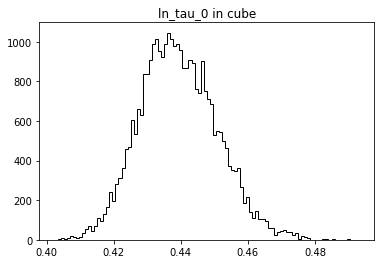

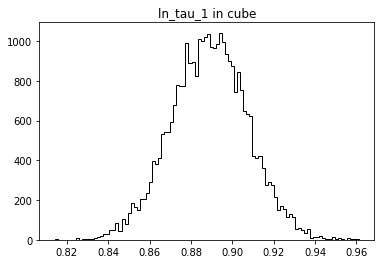

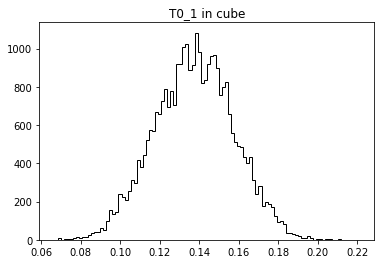

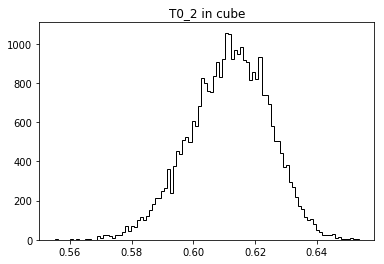

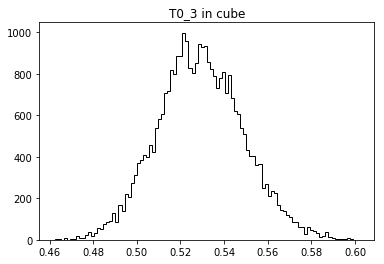

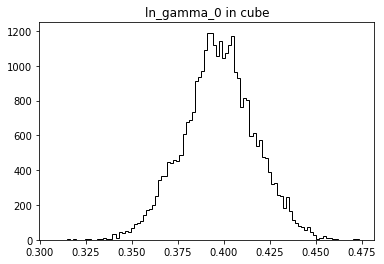

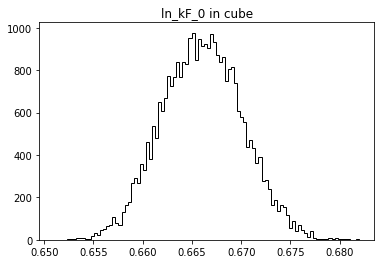

In [13]:
sampler.plot_histograms(cube=True)

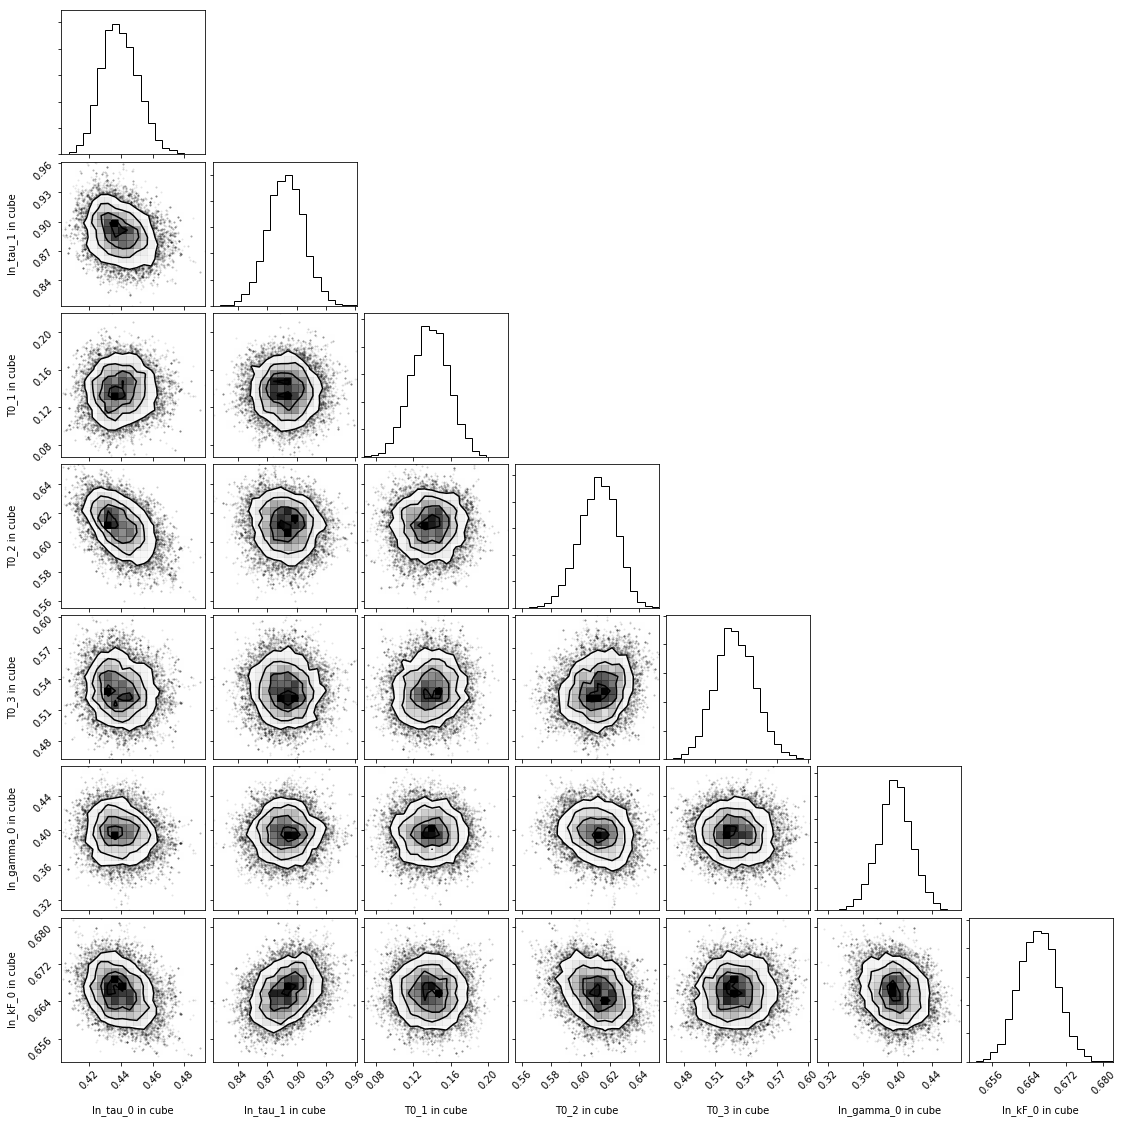

In [14]:
sampler.plot_corner(cube=True)

### Plot results for dimensional parameters

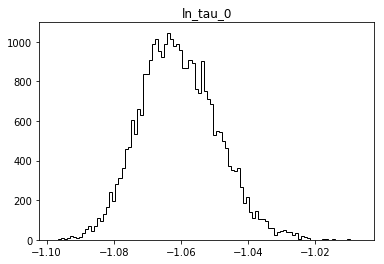

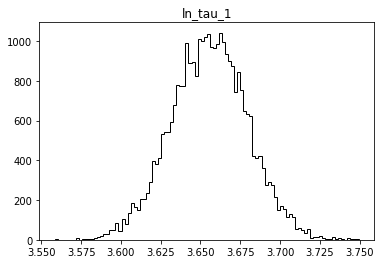

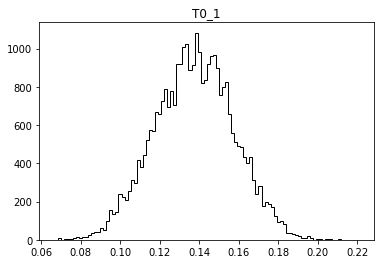

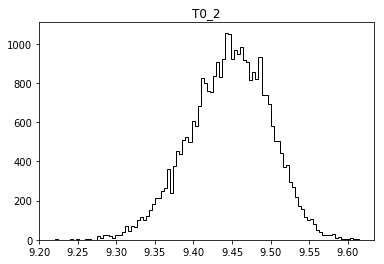

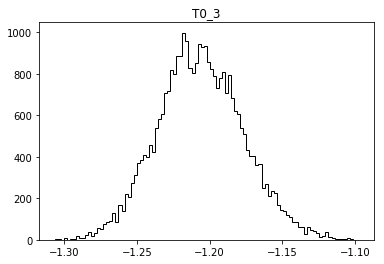

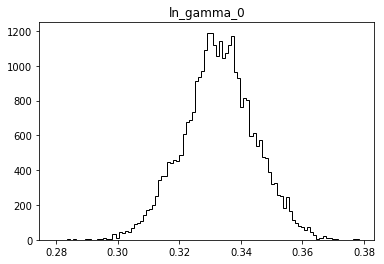

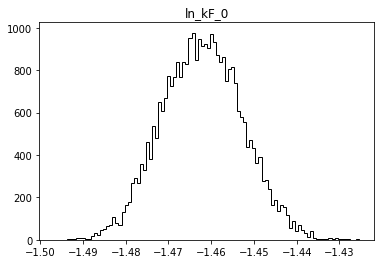

In [15]:
sampler.plot_histograms(cube=False)

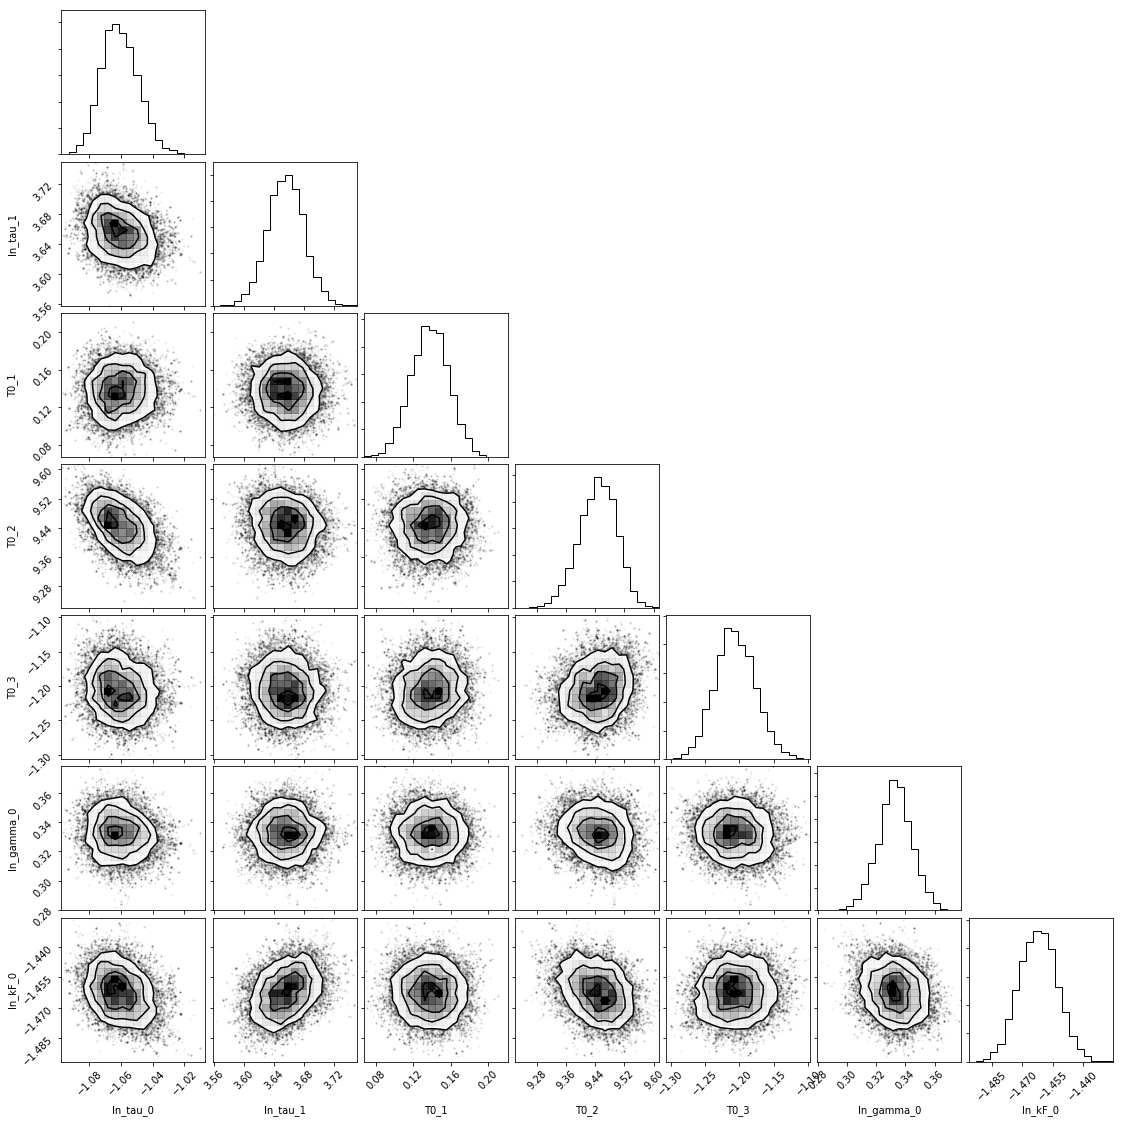

In [16]:
sampler.plot_corner(cube=False)

### Use likelihood object to make other useful plots

In [17]:
# get best fit model
ind = np.unravel_index(np.argmax(sampler.sampler.lnprobability, axis=None), sampler.sampler.lnprobability.shape)
best_fit=sampler.sampler.chain[ind]

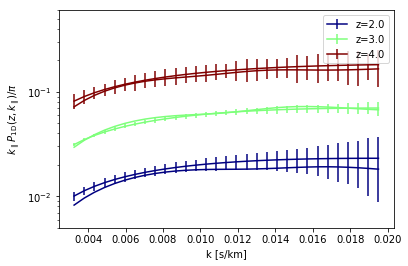

In [18]:
sampler.like.plot_p1d(values=best_fit,plot_every_iz=1)

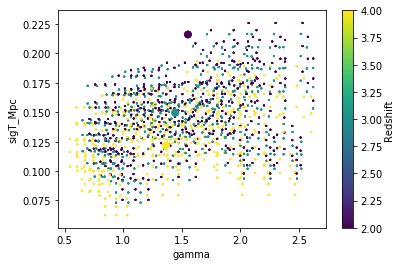

In [19]:
sampler.like.overplot_emulator_calls('gamma','sigT_Mpc',values=best_fit)

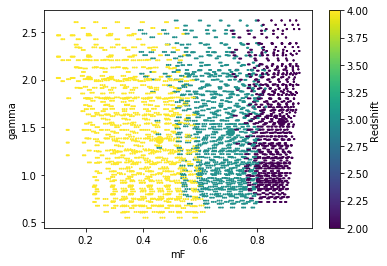

In [20]:
sampler.like.overplot_emulator_calls('mF','gamma',values=best_fit)

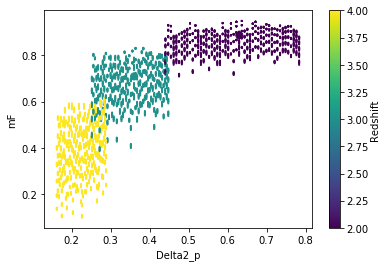

In [21]:
sampler.like.overplot_emulator_calls('Delta2_p','mF',values=best_fit)

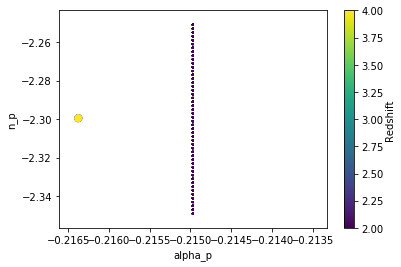

In [22]:
sampler.like.overplot_emulator_calls('alpha_p','n_p',values=best_fit)

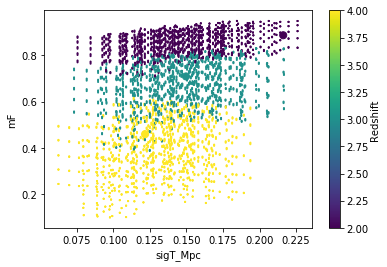

In [23]:
sampler.like.overplot_emulator_calls('sigT_Mpc','mF',values=best_fit)

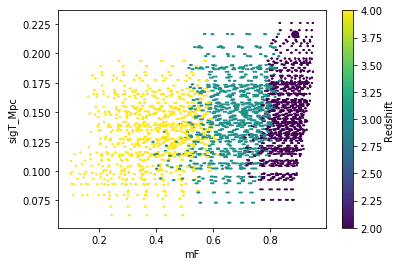

In [24]:
sampler.like.overplot_emulator_calls('mF','sigT_Mpc',values=best_fit)

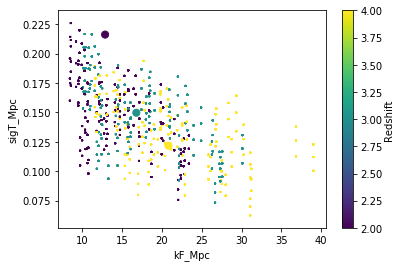

In [25]:
sampler.like.overplot_emulator_calls('kF_Mpc','sigT_Mpc',values=best_fit)

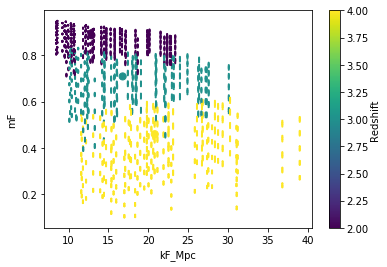

In [26]:
sampler.like.overplot_emulator_calls('kF_Mpc','mF',values=best_fit)

### Write chain to file for later use

In [27]:
chain_filename='test'
sampler.write_chain_to_file(chain_filename)

### Read pre-computed chain

In [28]:
new_sampler = emcee_sampler.EmceeSampler(emulator=emu,free_parameters=free_parameters,
                                         read_chain_file=chain_filename,verbose=True)

use default likelihood
Note: redshifts have been re-sorted (earliest first)
will read chain from file test
done setting up sampler


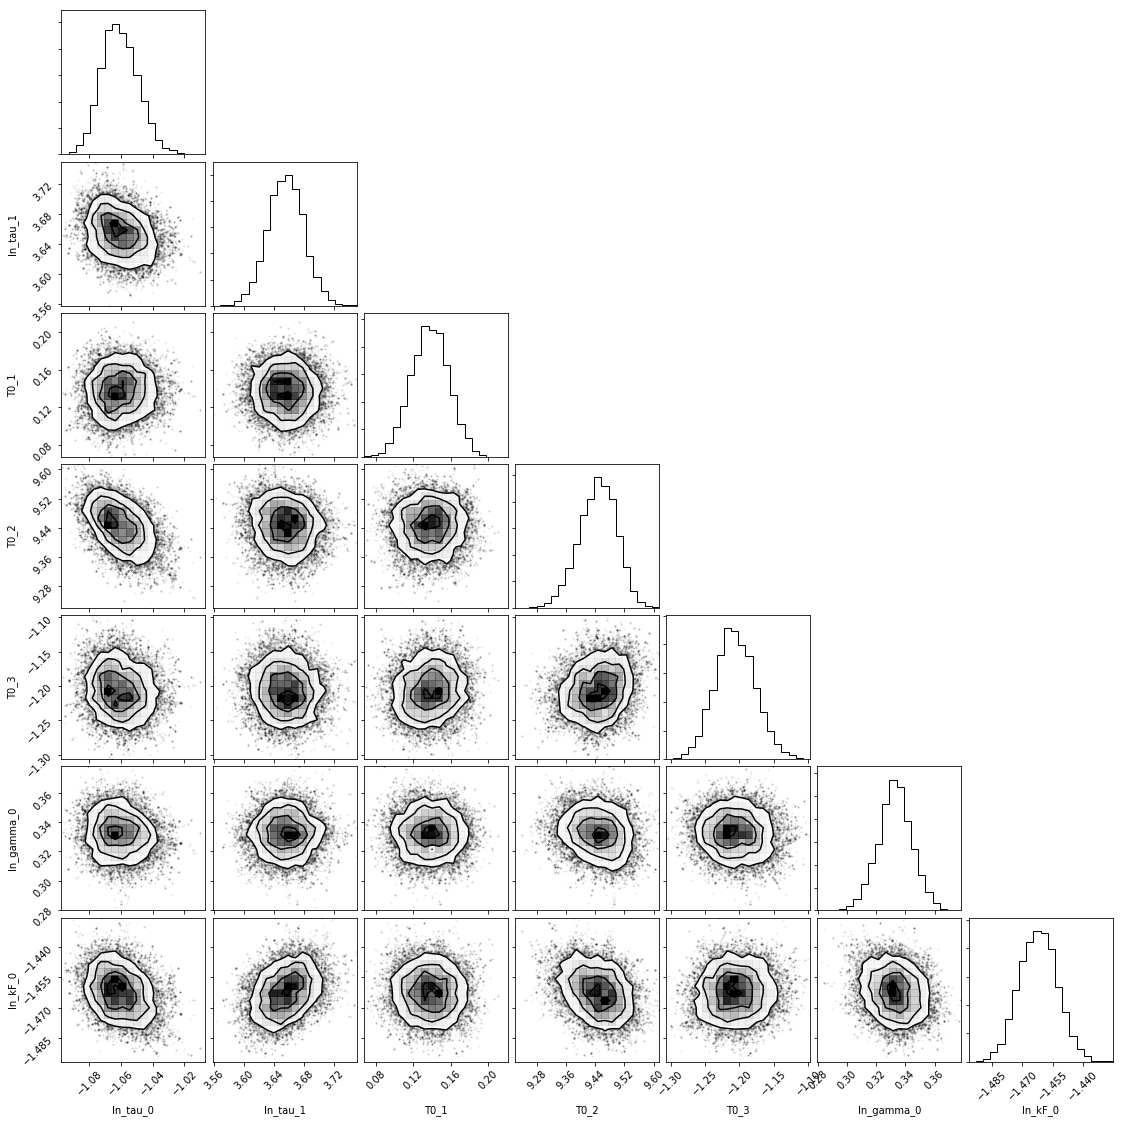

In [29]:
new_sampler.plot_corner(cube=False)

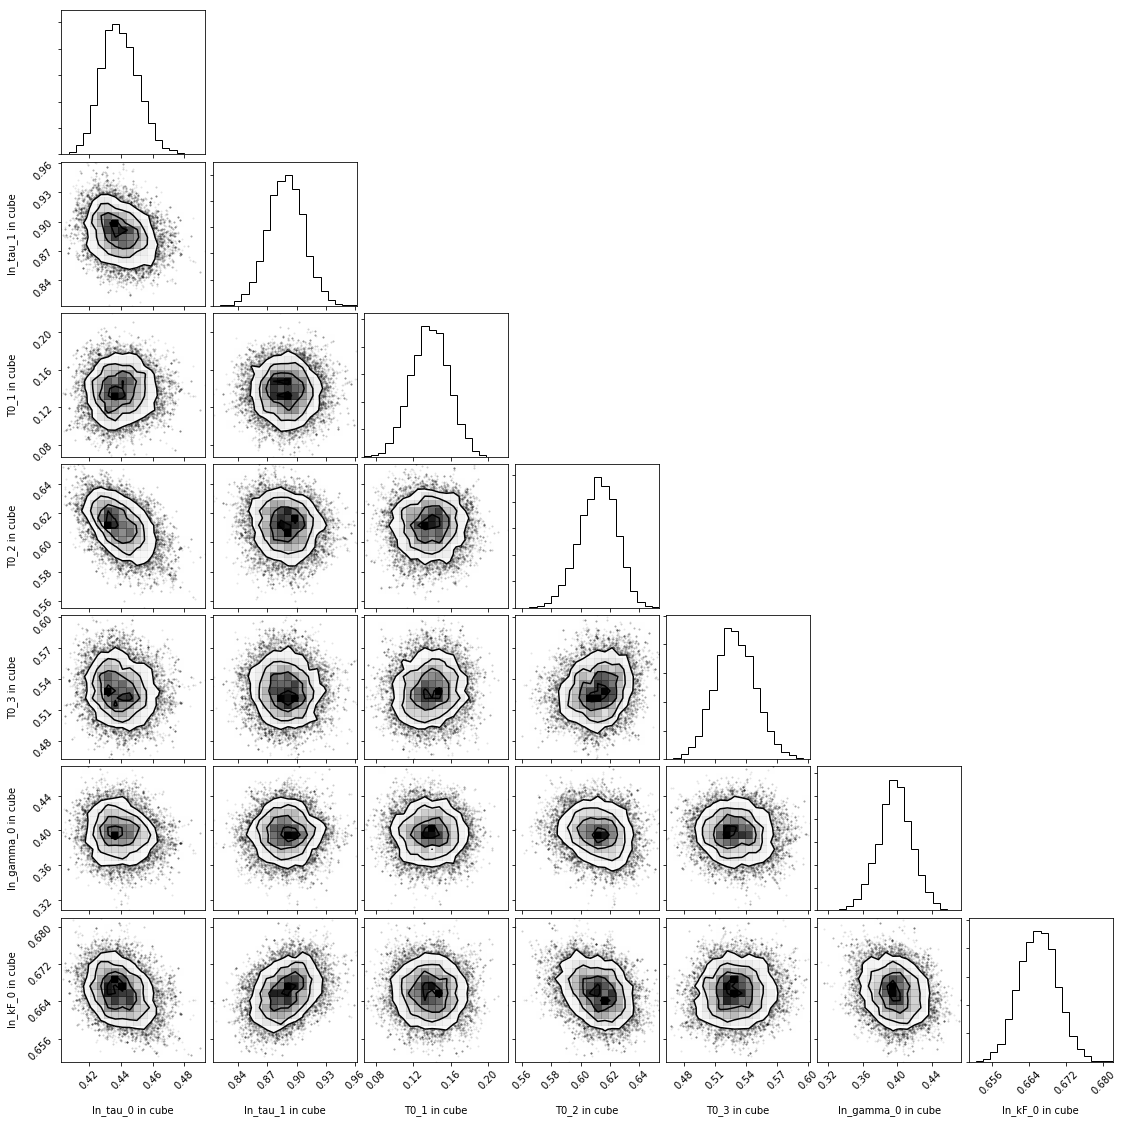

In [30]:
new_sampler.plot_corner(cube=True)

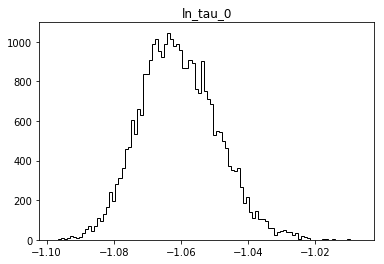

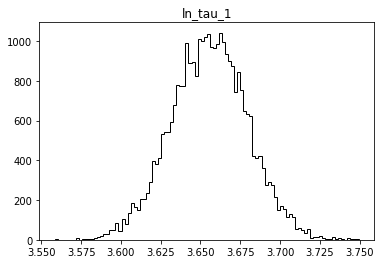

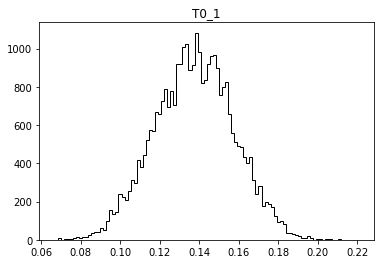

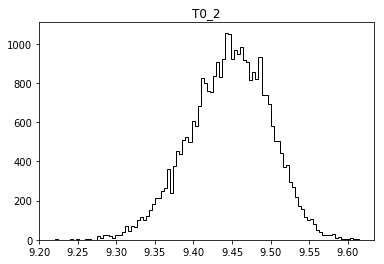

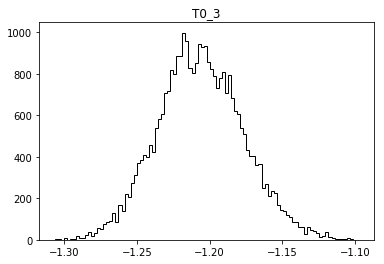

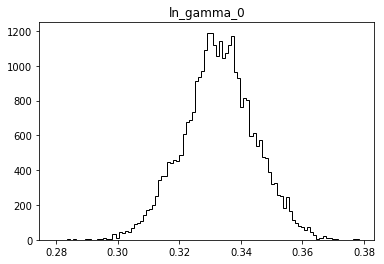

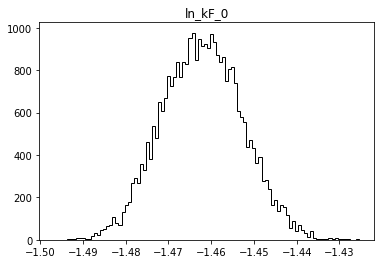

In [31]:
new_sampler.plot_histograms(cube=False)